# **3. Feature Selection**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv("../data/heart_disease.csv")
df_clean = pd.read_csv("../data/heart_disease_clean.csv")

X = df_clean.drop(columns='num')
y = df_clean['num'].astype(int)

C:\Users\Menna\AppData\Local\Temp\ipykernel_10060\1967247688.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette="viridis")


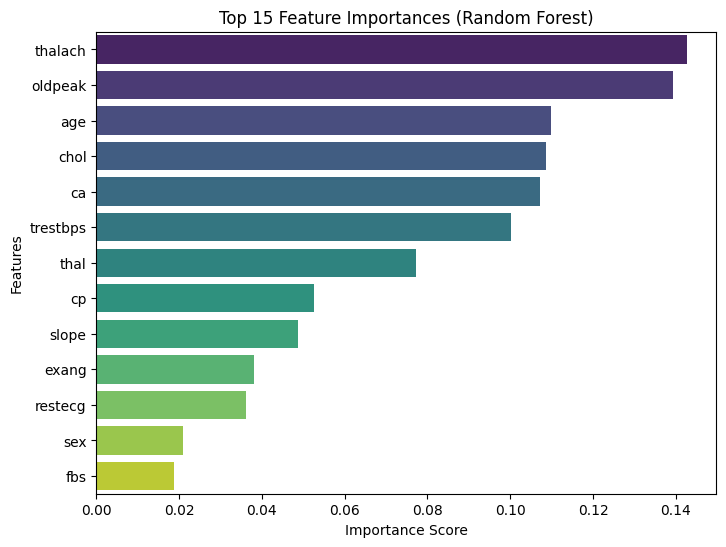

In [3]:
from sklearn.ensemble import RandomForestClassifier

X_fs = df_clean.drop(columns='num')
y_fs = df_clean['num'].astype(int)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X_fs, y_fs)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_fs.columns).sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(8,6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**3.2 Recursive Feature Elimination (RFE)**

In [4]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced")
rfe = RFE(estimator=logr, n_features_to_select=10)  # choose top 10
rfe.fit(X, y)

# Selected features
rfe_selected = X.columns[rfe.support_]
print("RFE selected features:", list(rfe_selected))

RFE selected features: ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


**3.3 Chi-Square Test**

Chi2 selected features: ['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


C:\Users\Menna\AppData\Local\Temp\ipykernel_10060\1627391001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_scores[:15], y=chi2_scores.index[:15], palette="magma")


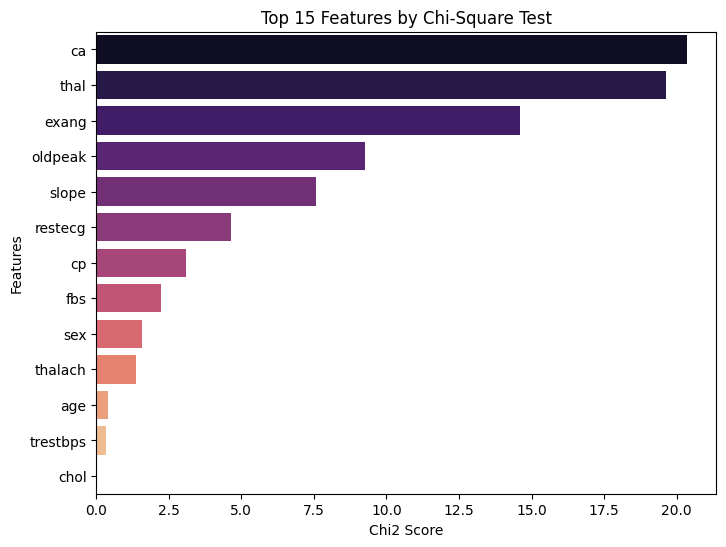

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale to [0,1] for chi2
X_minmax = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_minmax, y)

chi2_selected = X.columns[chi2_selector.get_support()]
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)

print("Chi2 selected features:", list(chi2_selected))

# Plot top 15 chi2 scores
plt.figure(figsize=(8,6))
sns.barplot(x=chi2_scores[:15], y=chi2_scores.index[:15], palette="magma")
plt.title("Top 15 Features by Chi-Square Test")
plt.xlabel("Chi2 Score")
plt.ylabel("Features")
plt.show()

**3.4 Combine and Select Final Features**

In [6]:
# Intersection of selected features
final_features = set(rfe_selected).intersection(set(chi2_selected)).intersection(set(importances.index[:15]))
print("Final selected features:", final_features)

# Reduced dataset
X_reduced = X[list(final_features)]
print("Reduced dataset shape:", X_reduced.shape)

# Save reduced dataset
reduced_df = pd.concat([X_reduced, y], axis=1)
reduced_df.to_csv('..\data\heart_reduced.csv', index=False)

Final selected features: {'fbs', 'thal', 'oldpeak', 'sex', 'slope', 'ca', 'thalach', 'restecg', 'cp'}
Reduced dataset shape: (297, 9)


In [7]:
import json

X = reduced_df.drop(columns="num")

feature_names = list(X.columns) 
with open("../models/feature_names.json", "w") as f:
    json.dump(feature_names, f)
